In [1]:
!pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 412.3 MB 26 kB/s 
     |████████████████████████████████| 50 kB 8.9 MB/s 
     |████████████████████████████████| 503 kB 70.4 MB/s 
     |████████████████████████████████| 3.8 MB 51.7 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=457299bbf2ab50e5650add9652d5cc8787fe2951f7d86f52a0d1ca275b8636c1
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting un

In [2]:
!pip install -q lucid>=0.2.3
!pip install -q moviepy

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.0 which is incompatible.
tensorflow-probability 0.16.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.0 which is incompatible.
cmdstanpy 1.0.4 requires numpy>=1.21, but you have numpy 1.19.0 which is incompatible.


In [3]:
!pip install imageio==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 5.2 MB/s 
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303885 sha256=80539249eb74033e746bcc31dc5fefb76fa89e6fd5dd8849bc44576a6b25df20
  Stored in directory: /root/.cache/pip/wheels/46/20/07/7bb9c8c44e6ec2efa60fd0e6280094f53f65f41767ef69a5ee
Successfully built imageio
  Attempting uninstall: imageio
    Found existing installation: imageio 2.9.0
    Uninstalling imageio-2.9.0:
      Successfully uninstalled imageio-2.9.0


In [4]:
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files
import tensorflow.compat.v1.gfile as gfile
import lucid.misc.io.showing as show

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3063808/45929032 bytes (6.7%)7290880/45929032 bytes (15.9%)11444224/45929032 bytes (24.9%)15286272/45929032 bytes (33.3%)19259392/45929032 bytes (41.9%)23142400/45929032 bytes (50.4%)25616384/45929032 bytes (55.8%)28164096/45929032 bytes (61.3%)30089216/45929032 bytes (65.5%)32243712/45929032 bytes (70.2%)34209792/45929032 bytes (74.5%)36306944/45929032 bytes (79.1%)

In [6]:
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [43]:
gl.glClear(gl.GL_COLOR_BUFFER_BIT)


def drawpoints(x,y):
    gl.glPointSize(5) #pixel size. by default 1 thake
    gl.glColor3f(1,0,1)
    gl.glBegin(gl.GL_POINTS)
    gl.glVertex2f(x,y) #jekhane show korbe pixel
    gl.glEnd()

def ZoneFind (x1,y1,x2,y2):
    dx=x2-x1
    dy=y2-y1
    if abs(dx)>=abs(dy):
        if dx>=0 and dy>=0:
            zone=0
        elif dx<=0 and dy>=0:
            zone = 3
        elif dx>=0 and dy<=0:
            zone=7
        elif dx<=0 and dy<=0:
            zone=4
    else:
        if dx>=0 and dy>=0:
            zone=1
        elif dx<=0 and dy>=0:
            zone=2
        elif dx>=0 and dy<=0:
            zone=6
        elif dx<=0 and dy<=0:
            zone=5
    return zone
            
def Zone0(x,y,zone):  
    if zone==0:
        Xnew,Ynew=x,y
        return Xnew,Ynew
    elif zone==1:
        Xnew,Ynew=y,x
        return Xnew,Ynew
    elif zone==2:
        Xnew,Ynew=y, -x
        return Xnew,Ynew
    elif zone==3:
        Xnew,Ynew=-x,y
        return Xnew,Ynew
    elif zone==4:
        Xnew,Ynew=-x,-y
        return Xnew,Ynew
    elif zone==5:
        Xnew,Ynew=-y,-x
        return Xnew,Ynew
    elif zone==6:
        Xnew,Ynew=-y,x
        return Xnew,Ynew
    else:
        Xnew,Ynew=x,-y
        return Xnew,Ynew
        

def Midpoint(x1,y1,x2,y2):
    zone=ZoneFind(x1,y1,x2,y2)
    x1,y1=Zone0(x1,y1,zone) 
    x2,y2=Zone0(x2,y2,zone) 
    dx=x2-x1    
    dy=y2-y1
    dE=2*dy
    dNE=2*dy-2*dx
    
    x=x1
    y=y1
    if dy<=dx:
        d=(2*dy)-dx
        while (x<=x2):
            Originalzone(x,y,zone)
            if (d<0):
                d=d+dE
                x=x+0.01
            else:
                x=x+0.01
                y=y+0.01
                d=d+dNE
    else:
        d=(2*dx)-dy
        while y<=y2:
            Originalzone(x,y,zone)
            if d<0:
                d = d+ dNE
                y = y+0.01
            else:
                d=d+dE
                x=x+0.01
                y=y+0.01
                

def Originalzone(x,y,zone):   
    if zone==0:
        Xnew,Ynew=x,y
    if zone==1:
        Xnew,Ynew=y,x
    if zone==2:
        Xnew,Ynew=-y,x
    if zone==3:
        Xnew,Ynew=-x,y
    if zone==4:
        Xnew,Ynew=-x,-y
    if zone==5:
        Xnew,Ynew=-y,-x
    if zone==6:
        Xnew,Ynew=y,-x
    if zone==7:
        Xnew,Ynew=x,-y
    drawpoints (Xnew,Ynew) 


#ID=20101502 and last two digits are 0 and 2

#For 0
Midpoint(-.5,-.5,-.5,.5)   
Midpoint(-.5,.5,-.1,.5)
Midpoint(-.5,-.5,-.1,-.5)
Midpoint(-.1,.5,-.1,-.5)


#For 2
Midpoint(.1,.5,.5,.5)
Midpoint(.5,.5,.5,0)
Midpoint(.1,0,.5,0)
Midpoint(.1,0,.1,-.5)
Midpoint(.1,-.5,.5,-.5)







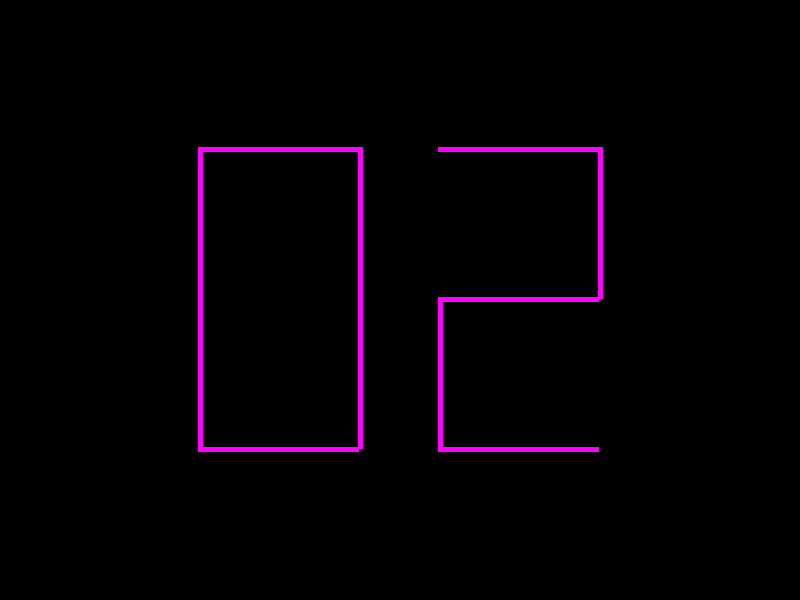

In [44]:
img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)